In [95]:
#Importing Data Manipulation Libraries
import numpy as np
import pandas as pd
#Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Warnings
import warnings 
warnings.filterwarnings('ignore')
#Importing Scikit-Learn Library
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split;
#Importing Metrics for Regression Model
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix
#Importing Logging
import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='model.log',force=True)


In [96]:
url = 'https://raw.githubusercontent.com/meet-vasita/Telemarketing_Classification_Model/refs/heads/main/Dataset/BankData.csv'

df = pd.read_csv(url,sep=';')
df.sample(frac=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4110,55,management,married,tertiary,no,236,no,no,cellular,4,aug,200,1,-1,0,unknown,no
65,51,blue-collar,divorced,secondary,no,203,yes,no,cellular,8,may,134,1,170,5,failure,no
3870,49,blue-collar,single,primary,no,1040,no,no,cellular,8,jul,474,2,-1,0,unknown,no
350,31,blue-collar,married,secondary,no,1660,yes,no,cellular,20,apr,342,1,-1,0,unknown,no
4229,62,self-employed,divorced,tertiary,no,6,yes,no,cellular,13,oct,216,1,183,4,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,34,services,married,secondary,no,586,yes,yes,unknown,8,may,224,2,-1,0,unknown,no
3456,35,self-employed,married,secondary,no,670,no,no,cellular,9,jul,378,1,-1,0,unknown,no
2742,47,blue-collar,married,secondary,no,1203,yes,no,cellular,17,apr,239,2,-1,0,unknown,no
2134,58,retired,married,secondary,no,425,yes,yes,cellular,17,nov,100,1,-1,0,unknown,no


In [97]:
logging.info('Importing the dataset for model building')

In [98]:
df.shape

(4521, 17)

In [99]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [101]:
#Evaluate Descriptive Stats: EDA

#Step 1: Segregate Categorical Columns and Numerical Columns

categorical_num = df.select_dtypes(include=object)
numerical_num = df.select_dtypes(include=['int64','float64'])  

In [102]:
#Step2 : Evaluate Descriptive Stats

from collections import OrderedDict

stats = []

for i in numerical_num.columns:
    categorical_stats = OrderedDict({
        'Feature':i,
        'Mean':df[i].mean(),
        'Medain':df[i].median(),
        'Mode':df[i].mode()[0],
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Skewness':df[i].skew(),  
        'Kurtosis':df[i].kurt(),
        'Max':df[i].max(),
        'Min':df[i].min(),
        'Variance':df[i].var()
    })
    stats.append(categorical_stats)
    report = pd.DataFrame(stats)

report

,Feature,Mean,Medain,Mode,Q1,Q3,IQR,Standard Deviation,Skewness,Kurtosis,Max,Min,Variance
0,age,41.170095,39.0,34,33.0,49.0,16.0,10.576211,0.699501,0.348775,87,19,1.118562e+02
1,balance,1422.657819,444.0,0,69.0,1480.0,1411.0,3009.638142,6.596431,88.390332,71188,-3313,9.057922e+06
2,day,15.915284,16.0,20,9.0,21.0,12.0,8.247667,0.094627,-1.039531,31,1,6.802402e+01
3,duration,263.961292,185.0,123,104.0,329.0,225.0,259.856633,2.772420,12.530050,3025,4,6.752547e+04
4,campaign,2.793630,2.0,1,1.0,3.0,2.0,3.109807,4.743914,37.168920,50,1,9.670897e+00
5,pdays,39.766645,-1.0,-1,-1.0,-1.0,0.0,100.121124,2.717071,7.957128,871,-1,1.002424e+04
6,previous,0.542579,0.0,0,0.0,0.0,0.0,1.693562,5.875259,51.995212,25,0,2.868153e+00


In [103]:
#Classification Problems uses Logistic Regression and it Always use Sigmoid Function
# if IQR is 0 then drop that columns 

In [104]:
'''
The dataset consists of 4521 rows and 17 columns. this dataset belongs to the portugal bank where our aim is to classify
where our aim is to to classify whether the customer will subscribe the bank term deposit or not.

Type of machine learning model: Binary Classification

Above Dataset is a type of multivariate analysis.

X: Independent Columns
y: Target Columns / Dependent Columns

Here, 'y' acts as Target Column / Dependent Column.
'''

#Checking the Distribution of people who subscribe the term deposit
#Based on the distribution of target column, we found that the data is imbalanced.

"\nThe dataset consists of 4521 rows and 17 columns. this dataset belongs to the portugal bank where our aim is to classify\nwhere our aim is to to classify whether the customer will subscribe the bank term deposit or not.\n\nType of machine learning model: Binary Classification\n\nAbove Dataset is a type of multivariate analysis.\n\nX: Independent Columns\ny: Target Columns / Dependent Columns\n\nHere, 'y' acts as Target Column / Dependent Column.\n"

<Axes: ylabel='count'>

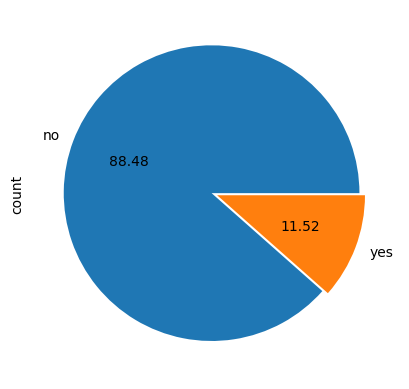

In [105]:
df['y'].value_counts().plot(kind='pie',autopct='%1.2f',explode=[0.02,0.02])

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

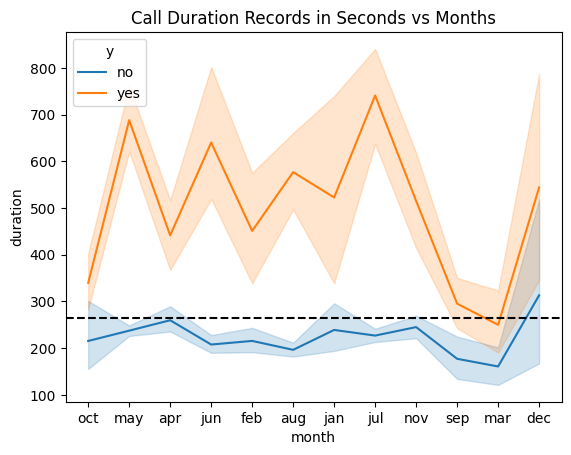

In [106]:
sns.lineplot(x=df['month'],y=df['duration'],hue=df['y'])
plt.axhline(df['duration'].mean(),linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

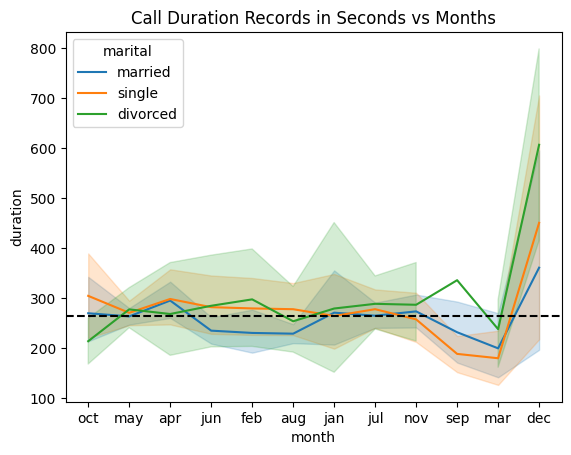

In [107]:
sns.lineplot(x=df['month'],y=df['duration'],hue=df['marital'])
plt.axhline(df['duration'].mean(),linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

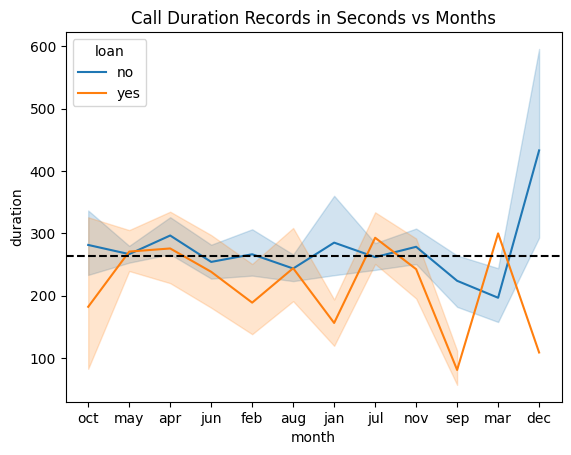

In [108]:
sns.lineplot(x=df['month'],y=df['duration'],hue=df['loan'])
plt.axhline(df['duration'].mean(),linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

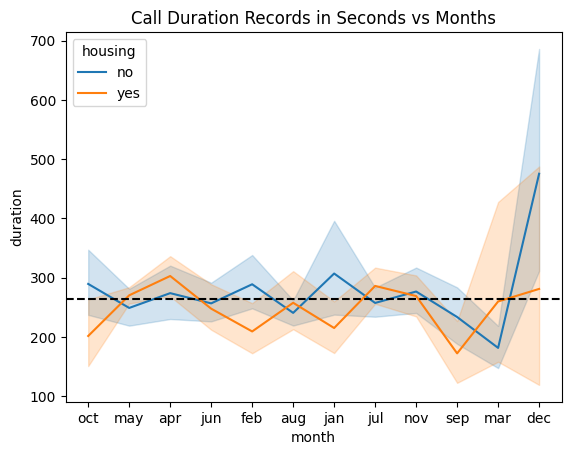

In [109]:
sns.lineplot(x=df['month'],y=df['duration'],hue=df['housing'])
plt.axhline(df['duration'].mean(),linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')

<Axes: ylabel='count'>

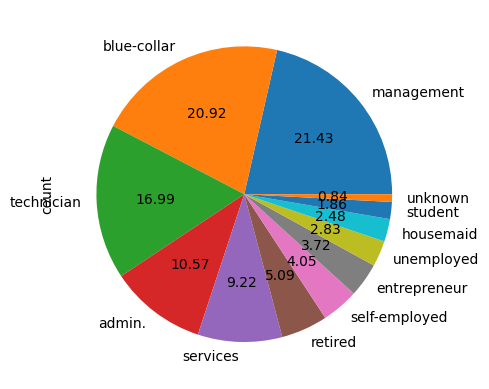

In [110]:
df['job'].value_counts().plot(kind='pie',autopct='%1.2f')

In [111]:
#Data Insights

'''
1. 88.48% people are not subscribed bank term deposit.
2. The Average Call Duration Recorded 264 seconds. This can be one of the cause for the people who haven't subscribed the bank term deposit.
3. If the call duration more than 300 seconds the chances are that person will subscribe the bank term deposit.
4. The Target audiance is Divorced Peoples.
5. The Person Who Took the loan are excluded from bank term deposit subscription.
6. The Persom Who Took the housing loan also excluded from bank term deposit subscription.
'''

"\n1. 88.48% people are not subscribed bank term deposit.\n2. The Average Call Duration Recorded 264 seconds. This can be one of the cause for the people who haven't subscribed the bank term deposit.\n3. If the call duration more than 300 seconds the chances are that person will subscribe the bank term deposit.\n4. The Target audiance is Divorced Peoples.\n5. The Person Who Took the loan are excluded from bank term deposit subscription.\n6. The Persom Who Took the housing loan also excluded from bank term deposit subscription.\n"

In [112]:
management = df[df['job'] == 'management']

<Axes: ylabel='count'>

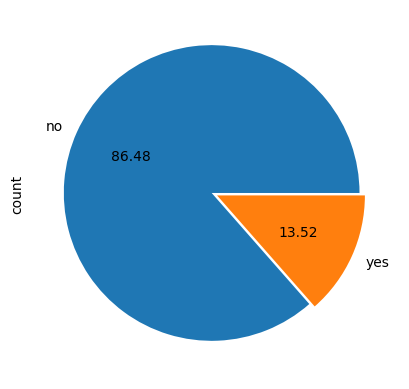

In [113]:
management['y'].value_counts().plot(kind='pie',autopct='%1.2f',explode=[0.02,0.02])

<Axes: xlabel='balance'>

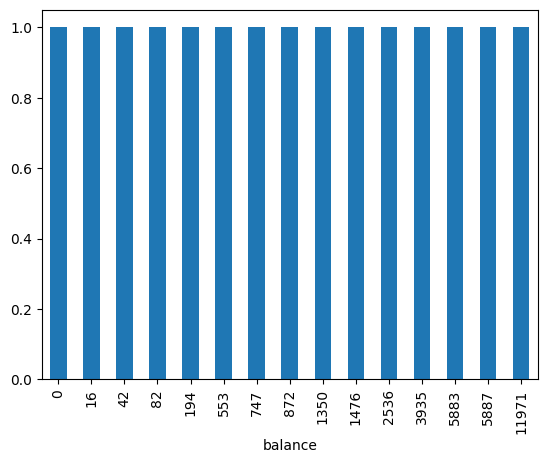

In [114]:
management['balance'][:15].sort_values(ascending=True).value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Call Duration Records in Seconds vs Months')

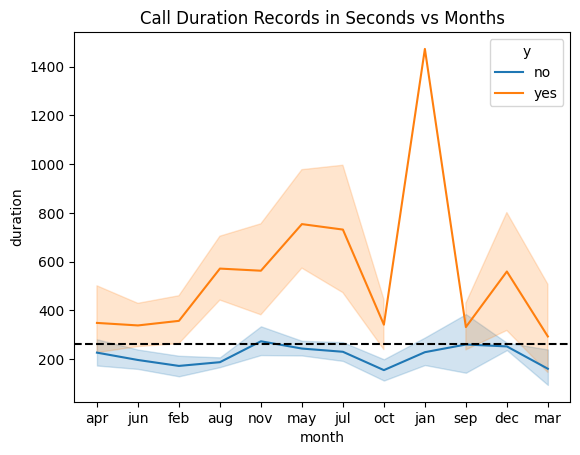

In [115]:
sns.lineplot(x=management['month'],y=management['duration'],hue=management['y'])
plt.axhline(264,linestyle='--',color = 'black')
plt.title('Call Duration Records in Seconds vs Months')

In [116]:
#Technician, Admin,Bluecollar
bluecollar = df[df['job'] == 'blue-collar']

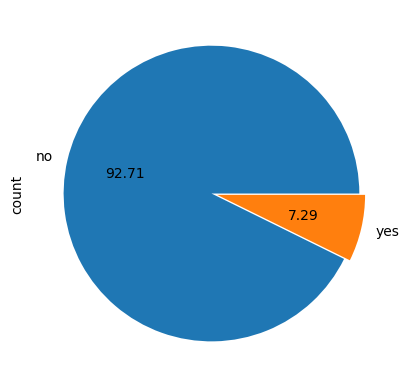

In [117]:
bluecollar['y'].value_counts().plot(kind = 'pie',autopct = '%1.2f', explode = [0.02,0.02])
plt.show()

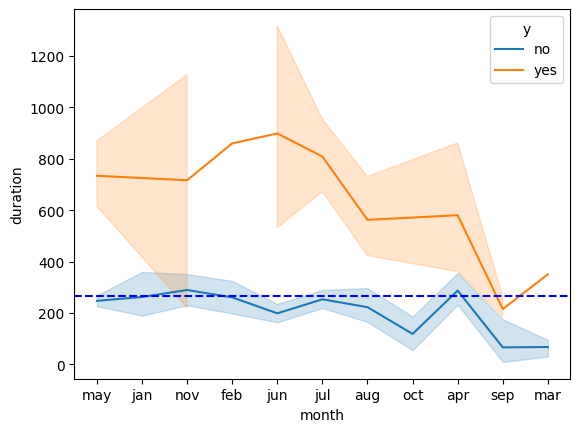

In [118]:
sns.lineplot(x = bluecollar['month'], y = bluecollar['duration'], hue= bluecollar['y'])
plt.axhline(264,linestyle = '--',c = 'b' )
plt.show()


In [119]:
technician = df[df['job'] == 'technician']

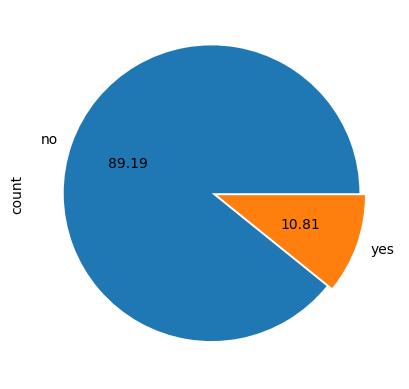

In [120]:
technician['y'].value_counts().plot(kind = 'pie',autopct = '%1.2f', explode = [0.02,0.02])
plt.show()

<Axes: ylabel='balance'>

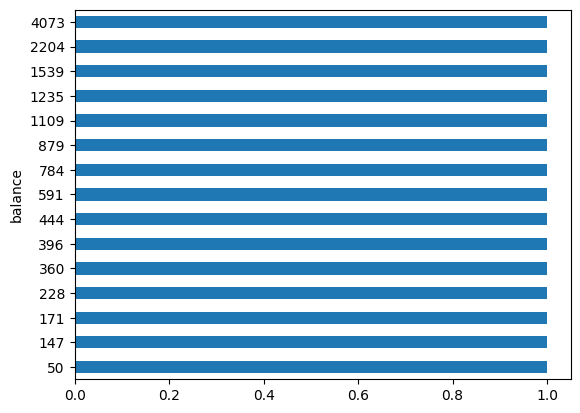

In [121]:
technician['balance'][:15].sort_values(ascending = True).value_counts().plot(kind = 'barh')

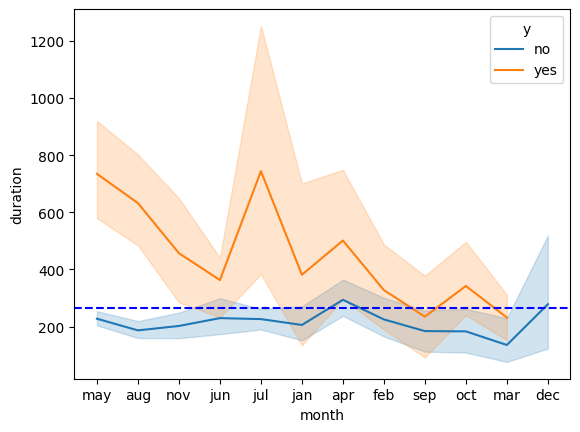

In [122]:
sns.lineplot(x = technician['month'], y = technician['duration'], hue= technician['y'])
plt.axhline(264,linestyle = '--',c = 'b' )
plt.show()

In [123]:
admin = df[df['job'] == 'admin.']

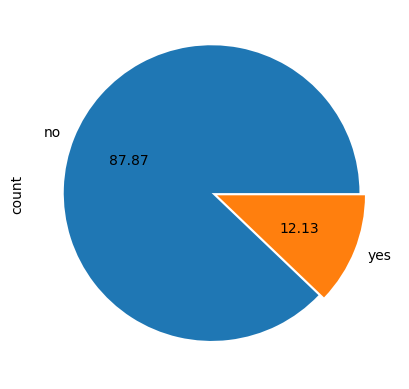

In [124]:
admin['y'].value_counts().plot(kind = 'pie',autopct = '%1.2f', explode = [0.02,0.02])
plt.show()

<Axes: ylabel='balance'>

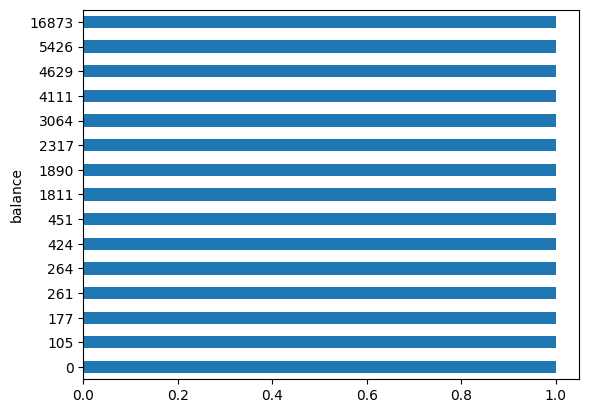

In [125]:
admin['balance'][:15].sort_values(ascending = True).value_counts().plot(kind = 'barh')

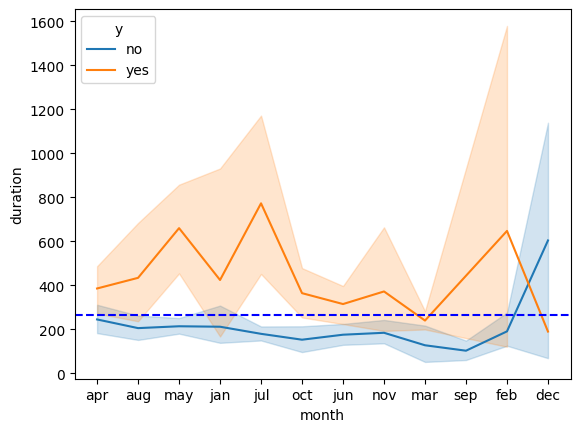

In [126]:
sns.lineplot(x = admin['month'], y = admin['duration'], hue= admin['y'])
plt.axhline(264,linestyle = '--',c = 'b' )
plt.show()

In [127]:
'''
pdays and previous these two columns show IQR = 0, Hence we meed to drop these two columns from the dataset
'''
#Create the copy of the df

data = df.copy()
data.sample(frac=1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4368,54,services,divorced,secondary,no,1012,yes,no,cellular,12,may,33,3,175,2,other,no
2157,57,retired,married,secondary,no,523,no,yes,cellular,2,feb,49,6,-1,0,unknown,no
81,60,retired,married,primary,no,5,no,no,cellular,26,aug,63,2,-1,0,unknown,no
1936,37,management,single,tertiary,no,695,no,no,cellular,28,jan,233,1,-1,0,unknown,no
1806,45,management,married,tertiary,no,3370,no,no,unknown,12,jun,36,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,79,retired,divorced,unknown,no,2628,no,no,telephone,8,jul,220,7,450,2,failure,no
962,52,admin.,married,secondary,no,2347,no,yes,cellular,12,aug,603,3,-1,0,unknown,no
648,29,entrepreneur,married,secondary,no,178,yes,no,cellular,5,may,231,4,-1,0,unknown,no
462,45,management,divorced,tertiary,no,0,no,no,unknown,1,jun,5,1,-1,0,unknown,no


In [128]:
# Encoding using get_dummies method
'''
Observation:
1. The number of columns are increased, which impact badly w.r.t model building 
'''
data = pd.get_dummies(data,drop_first=True,dtype='int')
data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [129]:
#Encoding Technique: Label Encoder
'''
1. Independent Columns can be encoded directly using label encoder
2. Target Column must be decoded separately either by using replace function or map function
'''

preprocess_data = df.copy()
preprocess_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [130]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Transforming all the categorical columns : Independent Columns
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['poutcome'] = le.fit_transform(df['poutcome'])

#Transform Target Column to Numerical

df['y'] = df['y'].replace({
    'yes':1,
    'no':0
})

In [131]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,9,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


In [132]:
# Concept of Data Leakage
'''
Step1: Split the dataset into X and y
        X: Independent
        y: Dependent / Target

Step2: Split the data into train and test
        train data: Seen Data
        test data: Unseen Data

Step3: Try Balance the target column in case of classification problem
        Imbalance Technique: 1. Oversampling 2. Undersampling
    
Step4: Use Scaling Technique:
        MinMax Scaler
        Robust Scaler
        Standard Scaler
 
Step5: Model Building
'''

#Step1: Split the Dataset into X and y

X = df.drop(columns=['pdays','previous','y'],axis=1)
y = df['y']

#Step2: Split the dataset into train and test
X_train, X_test, y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=42)

#Step3: Balancing the target columns
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train,y_train = sm.fit_resample(X_train,y_train)
y_train.value_counts()

y
0    2795
1    2795
Name: count, dtype: int64

In [133]:
# from imblearn.under_sampling import ClusterCentroids
# cc = ClusterCentroids(random_state=42)
# X_train,y_train = cc.fit_resample(X_train,y_train)
# y_train.value_counts()

In [134]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DT = DecisionTreeClassifier().fit(X_train,y_train)
y_pred_DT = DT.predict(X_test)

print('The Model Accuracy for the Decesion Tree Classifier: ',accuracy_score(y_test,y_pred_DT)*100)

The Model Accuracy for the Decesion Tree Classifier:  83.34561532792925


In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

print('The Model Accuracy for the Random Forest Classifier: ',accuracy_score(y_test,y_pred_RF)*100)

The Model Accuracy for the Random Forest Classifier:  86.95652173913044


In [137]:
import xgboost as xg

xgb = xg.XGBClassifier(random_state = 42).fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Classifier: ',accuracy_score(y_test,y_pred_xgb)*100)



Model Accuracy for XGBoost Classifier:  87.54605747973471


In [138]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier().fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)

print('Model Accuracy for ADABoost Classifier:',accuracy_score(y_test,y_pred_ada)*100)

Model Accuracy for ADABoost Classifier: 82.16654384672071


In [139]:
from sklearn.ensemble import GradientBoostingClassifier

gbr = GradientBoostingClassifier().fit(X_train,y_train)
y_pred_gbr = gbr.predict(X_test)

print('Model Accuracy for Gradient Boosting Classifier:',accuracy_score(y_test,y_pred_gbr)*100)

Model Accuracy for Gradient Boosting Classifier: 85.70375829034636


In [140]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_pred_knn = KNN.predict(X_test)

print('Model Accuracy for KNN Neighbors Classifier:',accuracy_score(y_test,y_pred_knn)*100)

Model Accuracy for KNN Neighbors Classifier: 81.0611643330877
